In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
titanic_data=fetch_openml('titanic',version=1,as_frame=True)

C:\Users\Taimur\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
C:\Users\Taimur\anaconda3\Lib\site-packages\sklearn\datasets\_arff_parser.py:200: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  frame = pd.concat(dfs, ignore_index=True)


In [5]:
df=titanic_data['data']
df['survived']=titanic_data['target']

In [6]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


C:\Users\Taimur\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='survived', ylabel='count'>

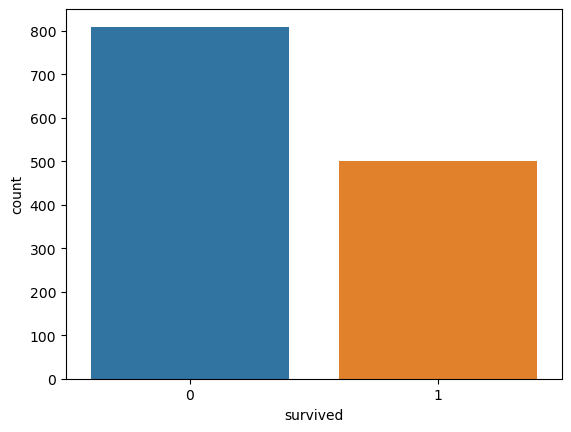

In [7]:
sns.countplot(x='survived',data=df)

C:\Users\Taimur\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='survived', ylabel='count'>

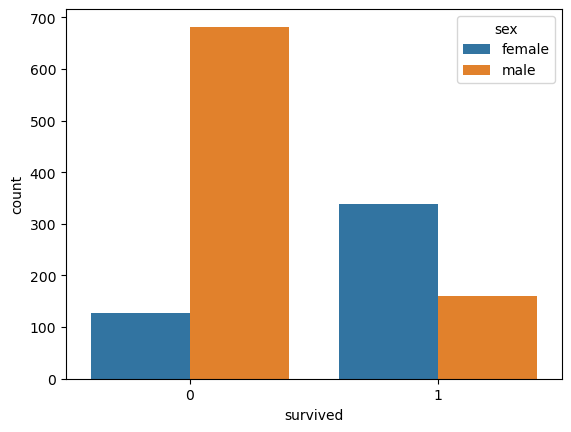

In [8]:
sns.countplot(x='survived',hue='sex',data=df)

C:\Users\Taimur\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Taimur\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.float64' object has no attribute 'startswith'

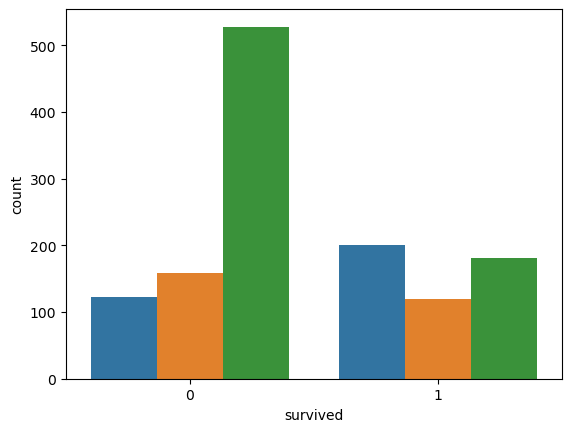

In [11]:
sns.countplot(x='survived',hue='pclass',data=df)

(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.1667 ,  8.15003, 16.13336, 24.11669, 32.10002, 40.08335,
        48.06668, 56.05001, 64.03334, 72.01667, 80.     ]),
 <BarContainer object of 10 artists>)

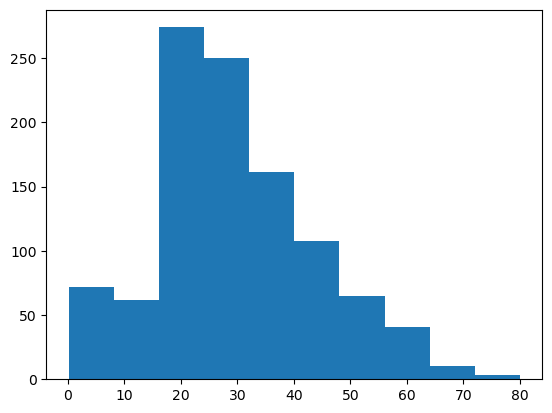

In [13]:
plt.hist(df['age'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(6), object(5)
memory usage: 116.8+ KB


In [15]:
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

<Axes: title={'center': 'missing values in percentage'}, ylabel='percentage'>

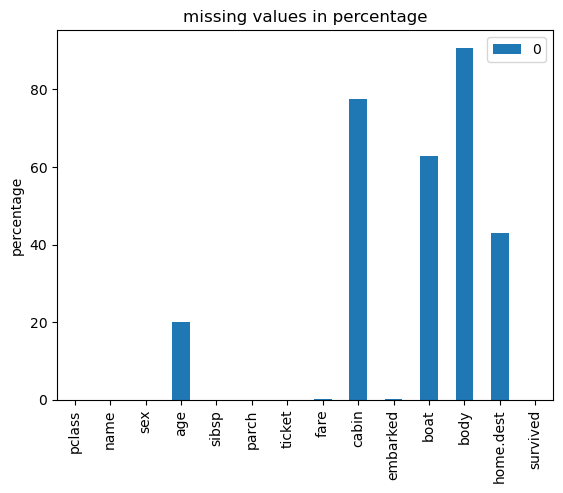

In [16]:
miss_vals=pd.DataFrame(df.isnull().sum()/len(df)*100)
miss_vals.plot(kind='bar',title='missing values in percentage',ylabel='percentage')

In [18]:
df['family']=df['sibsp']+df['parch']
df.loc[df['family']>0,'travelled_alone']=0
df.loc[df['family']==0,'travelled_alone']=1

In [19]:
df['family'].head()

0    0.0
1    3.0
2    3.0
3    3.0
4    3.0
Name: family, dtype: float64

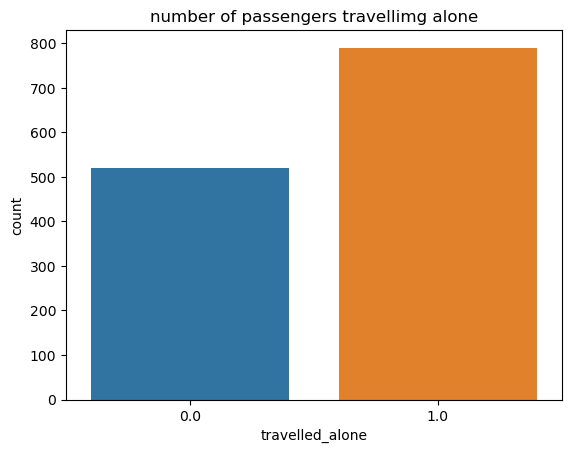

In [27]:
#df.drop(['parch','sibsp'],axis=1,inplace=True)
sns.countplot(x='travelled_alone',data=df)
plt.title('number of passengers travellimg alone')
plt.show()

In [28]:
df.head()

,pclass,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,travelled_alone
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0.0,1.0
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3.0,0.0
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0,3.0,0.0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0,3.0,0.0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0,3.0,0.0


In [29]:
df.drop(['name', 'ticket', 'home.dest', 'body', 'boat', 'cabin'],axis=1,inplace=True)

In [30]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled_alone
0,1.0,female,29.0000,211.3375,S,1,0.0,1.0
1,1.0,male,0.9167,151.5500,S,1,3.0,0.0
2,1.0,female,2.0000,151.5500,S,0,3.0,0.0
3,1.0,male,30.0000,151.5500,S,0,3.0,0.0
4,1.0,female,25.0000,151.5500,S,0,3.0,0.0


In [36]:
from sklearn.preprocessing import OneHotEncoder
df[['female','male']]=OneHotEncoder().fit_transform(df[['sex']]).toarray()
df[['sex','female','male']]

,sex,female,male
0,female,1.0,0.0
1,male,0.0,1.0
2,female,1.0,0.0
3,male,0.0,1.0
4,female,1.0,0.0
...,...,...,...
1304,female,1.0,0.0
1305,female,1.0,0.0
1306,male,0.0,1.0
1307,male,0.0,1.0


In [39]:
df['sex']=OneHotEncoder().fit_transform(df[['sex']]).toarray()[:,1]

In [43]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled_alone,female,male
0,1.0,0.0,29.0000,211.3375,S,1,0.0,1.0,1.0,0.0
1,1.0,1.0,0.9167,151.5500,S,1,3.0,0.0,0.0,1.0
2,1.0,0.0,2.0000,151.5500,S,0,3.0,0.0,1.0,0.0
3,1.0,1.0,30.0000,151.5500,S,0,3.0,0.0,0.0,1.0
4,1.0,0.0,25.0000,151.5500,S,0,3.0,0.0,1.0,0.0


In [44]:
df.isnull().sum()

pclass               0
sex                  0
age                263
fare                 1
embarked             2
survived             0
family               0
travelled_alone      0
female               0
male                 0
dtype: int64

In [47]:
from sklearn.impute import SimpleImputer
imp_mean=SimpleImputer(strategy='mean')
df['age']=imp_mean.fit_transform(df[['age']])
df['fare']=imp_mean.fit_transform(df[['fare']])

In [48]:
df.isnull().sum()

pclass             0
sex                0
age                0
fare               0
embarked           2
survived           0
family             0
travelled_alone    0
female             0
male               0
dtype: int64

In [52]:
imp_freq=SimpleImputer(strategy='most_frequent')

In [74]:
df['embarked']=imp_freq.fit_transform(df[['embarked']])

ValueError: 2

In [79]:
df.drop(['embarked'],axis=1,inplace=True)

In [80]:
df.isnull().sum()

pclass             0
sex                0
age                0
fare               0
survived           0
family             0
travelled_alone    0
female             0
male               0
dtype: int64

In [83]:
x=df.drop(['survived'],axis=1)
x.head()

,pclass,sex,age,fare,family,travelled_alone,female,male
0,1.0,0.0,29.0000,211.3375,0.0,1.0,1.0,0.0
1,1.0,1.0,0.9167,151.5500,3.0,0.0,0.0,1.0
2,1.0,0.0,2.0000,151.5500,3.0,0.0,1.0,0.0
3,1.0,1.0,30.0000,151.5500,3.0,0.0,0.0,1.0
4,1.0,0.0,25.0000,151.5500,3.0,0.0,1.0,0.0


In [84]:
y=df['survived']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: category
Categories (2, object): ['0', '1']

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [87]:
print(x_train.shape,y_train.shape)

(916, 8) (916,)


In [88]:
print(x_test.shape,y_test.shape)

(393, 8) (393,)


In [91]:
from sklearn.linear_model import LogisticRegression
mod=LogisticRegression()
mod.fit(x_train,y_train)

C:\Users\Taimur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
pred=mod.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [94]:
accuracy_score(y_test,pred)

0.7989821882951654

In [95]:
confusion_matrix(y_test,pred)

array([[206,  30],
       [ 49, 108]], dtype=int64)